# Display keypoint of three method

### This scripte is used to make visualisation different keypoints for different methode


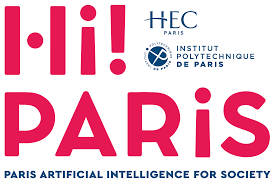

___


* <b>Author: Mazhou HU - ML Research Engineer - Institut Polytechnique de Paris</b>
* <b>Publication Date: 09/12/2022</b>
* <b>Goal: The goal of this notebook is to explain in a simple way how to use github api</b>

___

## Import the libraries

In [1]:
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#from lib.utils.common_draw_skeletons_ok import Human, BodyPart, CocoPart,draw_humans,CocoColors_pairs_vc,CocoColors_pairs_kn,CocoColors_parts_vc,CocoColors_parts_kn,CocoColors_pairs,CocoColors_parts 
matplotlib.use('TkAgg')
import xml.etree.ElementTree as et
import json 

In [2]:
XsensPairs = [(1,2), (2,3), (3,4),(4,5), (6,7), (8,9), (9,10), (10,11), (12,13), (13,14), (14,15),(1,16), (16,17), (17,18), (18,19), (1,20), (20,21), (21,22), (22,23)]
KinectPairs = [(0,1),(0,12), (0,16), (1,20), (2,3), (2,20), (4,20), (4,5), (5,6), (6,7), (8,20), (8,9), (9,10), (10,11), (12,13), (13,14), (14,15), (16,17), (17,18), (18,19)]
OpenposePairs = [(1, 2), (1, 5), (2, 3), (3, 4), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (1, 11),
    (11, 12), (12, 13), (1, 0), (0, 14), (14, 16), (0, 15), (15, 17), (2, 16), (5, 17)
]  
dic_Openpose={0:'Head',1:'mShoulder',2:'rShoulder',3:'rElbow',4:'rWrist',5:'lShoulder',6:'lElbow',7:'lWrist',8:'rHip',9:'rKnee',10:'rAnkle',11:'lHip',12:'lKnee',13:'lAnkle',14:'rEye', 15:'lEye',16:'rEar', 17:'lEar'}


## Creat the function

### Function for display kinect detecting file in 3D

In [3]:
def display_kinect(path_txt, n_frame):
    '''
        display_skeleton is used to display display keypoints of n_frame frame of kinect detecting file in 3D.
        
        Parameters:
        path_txt: String - adresse of file skeleton.txt allowed to load
        n_frame: Int - number of frame to find

        Return: 
        None
    
    '''
    #Open skeleton.txt file   
    data = pd.read_csv(path_txt,header=None)

    #Store for coordinates
    x=[]
    y=[]
    z=[]

    #Store for rotation 
    x_rot=[]
    y_rot=[]
    z_rot=[]
    w_rot=[]
    
    #Store for names of keypoints
    keypoint=[]

    #Store the names of keypoints and the corresponding  coordinates 
    n=int((232-7)/9)
    for i in range (n):
        x.append(float(data[9*i+9][n_frame+1]))
        y.append(float(data[9*i+10][n_frame+1]))
        z.append(float(data[9*i+11][n_frame+1]))
        keypoint.append(data[9*i+7][n_frame+1])
        x_rot.append(float(data[9*i+13][n_frame+1]))
        y_rot.append(float(data[9*i+14][n_frame+1]))
        z_rot.append(float(data[9*i+15][n_frame+1]))
        w_rot.append(float(data[9*i+12][n_frame+1]))

    #Verify the coordonates 
    # print('The values of X:', max(x) , min(x), x)
    # print('The values of y:', max(y) , min(y), y)
    # print('The values of z:', max(z) , min(z), z)

    ''' plot the figure '''

    #Set parameters for figure 
    fig1 = plt.figure(figsize=(12,6))
    fig1.subplots_adjust(bottom=-0.05,top=1.0)
    ax = fig1.add_subplot( projection='3d')
    ax.scatter3D(x, y, z, color=(0,1,0) ,s=10 ,marker='o')
    ax.set_facecolor('xkcd:white')

    #Set parameters for trois axes
    ax.set_xlim3d(min(x) - 0.1, max(x) + 0.1)
    ax.set_ylim3d(min(y) - 0.1, max(y) + 0.1)
    ax.set_zlim3d(min(z) - 0.1, max(z) + 0.1)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    #Draw line
    for pair in KinectPairs:    
        X_pair = [x[pair[0]],x[pair[1]]]
        Y_pair = [y[pair[0]],y[pair[1]]]
        Z_pair = [z[pair[0]],z[pair[1]]]
        ax.plot(X_pair, Y_pair, Z_pair, color='orange', linewidth=1)

    #Control the angle of view but it doesn't work well for our probleme
    #res = euler_from_quaternion(x_rot[0], y_rot[0], z_rot[0], w_rot[0])
    #ax.view_init(res[1], res[2])
    #ax.view_init()


    #Draw the name of keypoint
    for k, label in enumerate(keypoint):
        ax.text(x[k], y[k],z[k],label,fontsize=7)
    
    #plt.gcf().set_size_inches(11.7,8.3)
    plt.show()
    return print('---End processus---')

### Function for display Xsens detecting file in 3D

In [4]:
def display_Xsens(path_Xsens, n_frame):
    '''
        display_Xsens si used to display keypoints of the n_frame frame in Xsens detecting file in 3D
        
        Parameters:
        path_Sens: String - adresse of Xsens file allowed to load
        n_frame: Int - number of frame to find

        Return: 
        None
    
    '''

    
    #Open Xsens file 
    xtree = et.parse(path_Xsens)
    xroot = xtree.getroot()
    print('Numbre of frame for data of skeleton: ' + xroot[2][2][-1].attrib['index'])
    
    #Creat the store for coordinate 
    x=[]
    y=[]
    z=[]

    #Creat the store for name of  keypoint  
    keypoint=[]

    #Store the coordinates for each axes
    pos = xroot[2][2][n_frame][1].text.split(' ')
    for m in range (23):
        x.append(float(list(pos)[m*3]))
        y.append(float(list(pos)[m*3+1]))
        z.append(float(list(pos)[m*3+2]))
    
    #Store the names of keypoints 
    for k in xroot[2][1]:
        keypoint.append(k.attrib['label'])

    # Verify the cordinates
    # print('The values of X:', max(x) , min(x), x)
    # print('The values of y:', max(y) , min(y), y)
    # print('The values of z:', max(z) , min(z), z)

    ''' plot the figure '''

    #Set parameters for figure 
    fig2 = plt.figure(figsize=(12,6))
    fig2.subplots_adjust(bottom=-0.05,top=1.0)
    ax = fig2.add_subplot( projection='3d')
    ax.scatter3D(x, y, z, color=(0,1,0) ,s=10 ,marker='o')
    ax.set_facecolor('xkcd:white')

    #Set parameters for trois axes
    ax.set_xlim3d(min(x) - 0.1, max(x) + 0.1)
    ax.set_ylim3d(min(y) - 0.1, max(y) + 0.1)
    ax.set_zlim3d(min(z) - 0.1, max(z) + 0.1)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    #Draw line
    for pair in XsensPairs:    
        X_pair = [x[pair[0]-1],x[pair[1]-1]]
        Y_pair = [y[pair[0]-1],y[pair[1]-1]]
        Z_pair = [z[pair[0]-1],z[pair[1]-1]]
        ax.plot(X_pair, Y_pair, Z_pair, color='orange', linewidth=1)	

    #Draw the name of keypoint
    for k, label in enumerate(keypoint):
        ax.text(x[k], y[k],z[k],label,fontsize=7)
    
    plt.show()
    return print('---End processus---')

### Function for display openpose detecting file.

In [5]:
def display_json3d(path_json, n_frame):
    '''
        display_json si used to display the keypoint of n_frame frame of openpose detecting file in 3D
        
        Parameters:
        path_txt: String - adresse of json file allowed to load
        n_frame: Int - number of frame to find
        
        Return :
        None
        
        Attention: You have to find the frame with the keypoints detected, if the frame doesn't have the keypoints, 
        the function will not work. For example: frame 1-6 doesn't work
    '''
    #Open json file 
    f_json = open(path_json)
    # returns JSON object as a dictionary
    data_json=json.load(f_json)

    #Store for cordinates
    x=[]
    y=[]
    #Store for keypoints' names
    keypoint=[]

    #Save the keypoints' names and their cordinates
    pos = data_json['positions'][str(n_frame) + '.0' ]
    #print(pos)
    for i in pos:
        print(i)
        x.append(float(pos[i][0]))
        y.append(float(pos[i][1]))
        keypoint.append(i)
    z = np.zeros(len(x))
    #Plot the keypoints
    #Set parameters for figure 
    fig3 = plt.figure(figsize=(12,6))
    fig3.subplots_adjust(bottom=-0.05,top=1.0)
    ax = fig3.add_subplot( projection='3d')
    ax.scatter3D(x, y, z, color=(0,1,0) ,s=10 ,marker='o')
    ax.set_facecolor('xkcd:white')

    #Set parameters for trois axes
    ax.set_xlim3d(min(x) - 0.03, max(x) + 0.1)
    ax.set_ylim3d(min(y) - 0.03, max(y) + 0.1)
    ax.set_zlim3d(min(z) - 0.03, max(z) + 0.1)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    
    #Draw line
    for pair in OpenposePairs:
        #print('*****')
        if dic_Openpose[pair[0]] in keypoint and dic_Openpose[pair[1]] in keypoint:
            #print(keypoint.index(dic_Openpose[pair[0]]))
            #print(keypoint.index(dic_Openpose[pair[1]]))
            index_1 = keypoint.index(dic_Openpose[pair[0]])
            index_2 = keypoint.index(dic_Openpose[pair[1]])
            X_pair = [x[index_1],x[index_2]]
            Y_pair = [y[index_1],y[index_2]]
            Z_pair = [z[index_1],z[index_2]]
            ax.plot(X_pair,Y_pair,Z_pair,color='orange',linewidth=1)
        else:
            print ("pair doesn't be detected") 
        
    #Draw the name of keypoint
    for k, label in enumerate(keypoint):
        ax.text(x[k], y[k],z[k],label,fontsize=7)
    
    plt.show()
    return print('---End processus---')

# The test for display functions 

### Display the kinect detecting file 

In [6]:
########## S2_Exp2_bis##################
######For kinect method#######
#display the first frame
display_kinect('./S2_Ep2_Kienct_Skeleton.txt',0)
#display the last frame
#display_kinect('./S2_Ep2_Kinect_Skeleton.txt',735)


---End processus---


### The display the Xsens detecting file 

In [50]:
#####For Xsens method########
display_Xsens('./S2_Ep2-002.mvnx',100)
#display_Xsens('./S2_Ep2-002.mvnx',24023)


Numbre of frame for data of skeleton: 24039
---End processus---


### Display the openpose file

Attention: You have to find the frame with the keypoints detected, if the frame doesn't have the keypoints, 
the function will not work. For example: frame 1-6 doesn't work. This situation is just for openpose.

In [47]:
#For OpenPose method
display_json3d('./s2_Ep2_Video_RGB_openpose_json.json',129)
#display_json2d('./s2_Ep2_Video_RGB_openpose_json.json',80)


mShoulder
lShoulder
rHip
rKnee
lHip
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
pair doesn't be detected
---End processus---
